<a href="https://colab.research.google.com/github/mohaseen1/FSDSRegression/blob/main/ANN_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
!pwd

/content/drive/My Drive/ann regression


In [62]:
import os

In [63]:
Root="/content/drive/MyDrive/ann regression"
os.chdir(Root)

In [64]:
!pwd

/content/drive/MyDrive/ann regression


In [65]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [66]:
housing=fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [67]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [68]:
X=pd.DataFrame(housing.data,columns=housing.feature_names)

In [69]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [70]:
y=pd.DataFrame(housing.target,columns=['targets'])

In [71]:
y.head()

,targets
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [72]:
X.shape

(20640, 8)

In [73]:
y.shape

(20640, 1)

In [74]:
X_train_full,X_test,y_train_full,y_test=train_test_split(X,y,random_state=42)

In [75]:
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full,random_state=42)

In [76]:
print(X_train_full.shape)
print(X_test.shape)
print(X_train.shape)
print(X_valid.shape)

(15480, 8)
(5160, 8)
(11610, 8)
(3870, 8)


In [77]:
X_train_full.shape

(15480, 8)

In [78]:
X_test.shape

(5160, 8)

In [79]:
X_train.shape[1:]

(8,)

In [80]:
X_train.shape

(11610, 8)

In [81]:
LAYERS=[
    tf.keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="relu"),
    tf.keras.layers.Dense(1)

        ]

In [82]:
model=tf.keras.models.Sequential(LAYERS)

In [92]:
def coeff_determination(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [93]:
LOSS = "mse"
OPTIMIZER = "sgd"

model.compile(optimizer= OPTIMIZER, loss= LOSS, metrics=[coeff_determination])

In [94]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 30)                270       
                                                                 
 dense_9 (Dense)             (None, 10)                310       
                                                                 
 dense_10 (Dense)            (None, 5)                 55        
                                                                 
 dense_11 (Dense)            (None, 1)                 6         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [95]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [96]:
EPOCHS = 10

history = model.fit( X_train, y_train, epochs= EPOCHS, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 7s 4ms/step - loss: 1.1732 - coeff_determination: 0.0572 - val_loss: 0.5387 - val_coeff_determination: 0.5631
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4998 - coeff_determination: 0.6053 - val_loss: 0.4137 - val_coeff_determination: 0.6622
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4196 - coeff_determination: 0.6609 - val_loss: 0.3680 - val_coeff_determination: 0.7000
Epoch 4/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3867 - coeff_determination: 0.6920 - val_loss: 0.3697 - val_coeff_determination: 0.6934
Epoch 5/10
363/363 [==============================] - 1s 4ms/step - loss: 0.3718 - coeff_determination: 0.7055 - val_loss: 0.3457 - val_coeff_determination: 0.7134
Epoch 6/10
363/363 [==============================] - 2s 5ms/step - loss: 0.3630 - coeff_determination: 0.7108 - val_loss: 0.3324 - val_coeff_determination: 0.7268
Epoch 7/10
363/3

<Axes: >

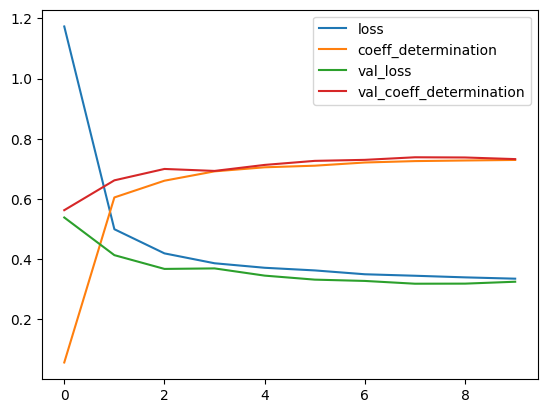

In [97]:
pd.DataFrame(history.history).plot()

In [98]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 1s 3ms/step - loss: 0.3460 - coeff_determination: 0.7158


[0.3460352122783661, 0.715802788734436]

In [99]:
X_test.shape

(5160, 8)

In [101]:
new = X_test[0]

In [102]:
new

array([-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
        0.38899735,  0.19374821,  0.2870474 ])

In [103]:
new.reshape((1,8))

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ]])

In [104]:
model.predict(new.reshape((1,8)))

1/1 [==============================] - 0s 76ms/step


array([[0.723804]], dtype=float32)